# Reshaping of data and CSV exports

In [67]:
import pandas as pd
import numpy as np
import missingno as msno

In [68]:
# load the data
data = pd.read_csv('../data/Train.csv')

In [69]:
data.head(1)

,ID,location,temp,precip,rel_humidity,wind_dir,wind_spd,atmos_press,target
0,ID_train_0,C,"nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,na...","nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,na...","nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,na...","nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,na...","nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,na...","nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,na...",45.126304


In [70]:
# retyping strings to lists for pd.explode() to work
for c in data.columns[2:-1]:
    data[c] = data[c].apply(lambda x: [a for a in str(x).split(",")])

In [71]:
data.head(1)

,ID,location,temp,precip,rel_humidity,wind_dir,wind_spd,atmos_press,target
0,ID_train_0,C,"[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...",45.126304


In [72]:
# generating hours column counting from 0 to 120 (5 days with first day having 25 measurements)
hours = list(range(121))

# inserting column before target column
data.insert(len(data.columns)-1, 'hours', [hours] * data.shape[0])

In [73]:
# generating days column counting from 1 to 5 (first day having 25 measurements)
day = [1, 2, 3, 4, 5]
rep = [25, 24, 24, 24, 24]
days = np.repeat(day, rep)

# inserting column before target column
data.insert(len(data.columns)-1, 'day', [days] * data.shape[0])

In [74]:
data.head(1)

,ID,location,temp,precip,rel_humidity,wind_dir,wind_spd,atmos_press,hours,day,target
0,ID_train_0,C,"[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",45.126304


In [75]:
# Explode the dataframe to convert from pseudo-wide to long format
data = data.explode(data.columns[2:-1].to_list())

In [76]:
# retype all values from string (was necessary for split) to float
for c in data.columns[2:]:
    data[c] = data[c].apply(lambda x: float(x))

In [77]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1880219 entries, 0 to 15538
Data columns (total 11 columns):
 #   Column        Dtype  
---  ------        -----  
 0   ID            object 
 1   location      object 
 2   temp          float64
 3   precip        float64
 4   rel_humidity  float64
 5   wind_dir      float64
 6   wind_spd      float64
 7   atmos_press   float64
 8   hours         float64
 9   day           float64
 10  target        float64
dtypes: float64(9), object(2)
memory usage: 172.1+ MB


In [78]:
# export the long dataframe as csv
data.to_csv('../data/train_long.csv')

In [79]:
# to further work with the data, replace all 'nan' strings with np.nan
data = data.replace('nan', np.nan)

In [80]:
# calculate how many observations have missing data (%)
np.round(data.isna().sum()/data.shape[0] * 100, 2)

ID               0.00
location         0.00
temp             6.34
precip           6.32
rel_humidity     6.28
wind_dir        10.37
wind_spd        10.37
atmos_press      6.10
hours            0.00
day              0.00
target           0.00
dtype: float64

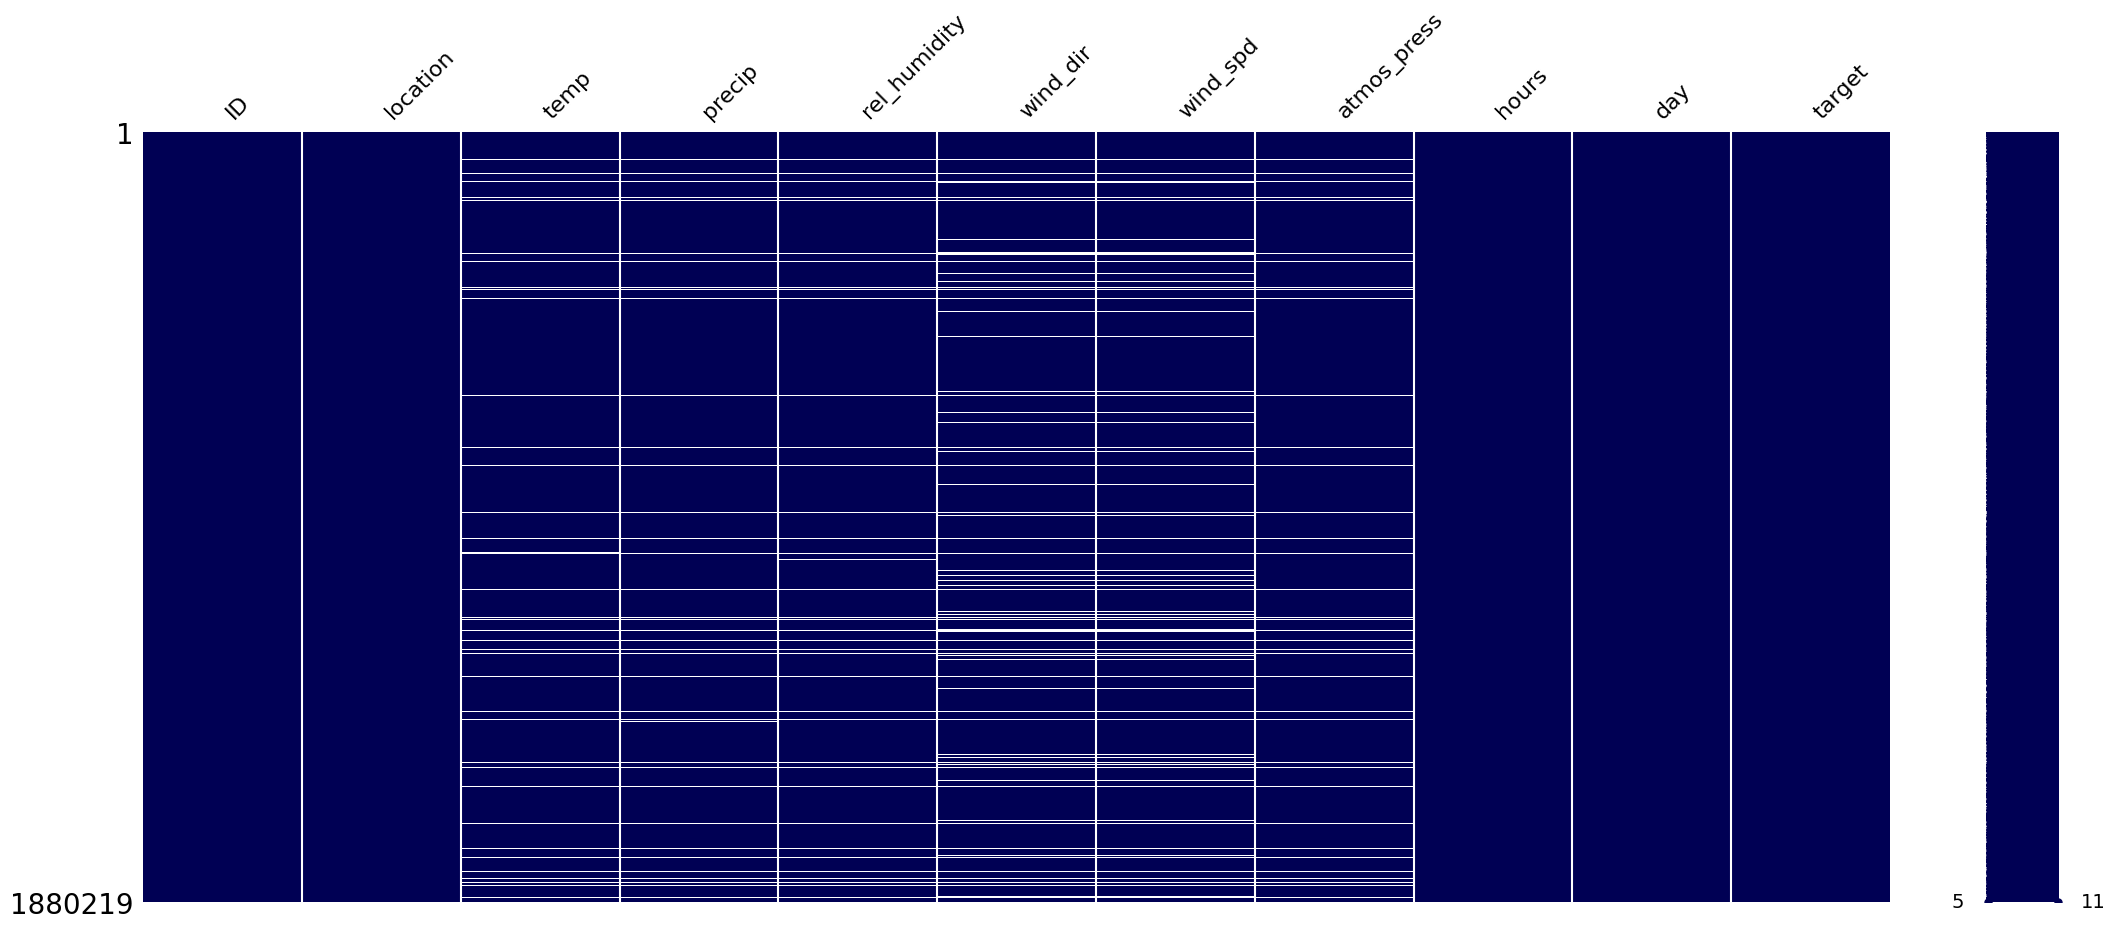

In [81]:
# check overlap of missing data
msno.matrix(data, color=(0, 0, 0.33));

In [82]:
data.tail(10)

,ID,location,temp,precip,rel_humidity,wind_dir,wind_spd,atmos_press,hours,day,target
15538,ID_train_9999,C,22.833333,0.0,0.803333,143.088013,0.436667,87.740833,111.0,5.0,127.983333
15538,ID_train_9999,C,22.691667,0.0,0.811667,133.426820,0.474167,87.725000,112.0,5.0,127.983333
15538,ID_train_9999,C,22.225000,0.0,0.840000,129.991897,0.490833,87.696667,113.0,5.0,127.983333
15538,ID_train_9999,C,21.841667,0.0,0.860833,130.078607,0.460000,87.673333,114.0,5.0,127.983333
15538,ID_train_9999,C,22.183333,0.0,0.864167,131.330002,0.461667,87.676667,115.0,5.0,127.983333
15538,ID_train_9999,C,20.716667,0.0,0.910000,336.823774,0.775833,87.722500,116.0,5.0,127.983333
15538,ID_train_9999,C,21.075000,0.0,0.871667,82.983274,0.325833,87.740833,117.0,5.0,127.983333
15538,ID_train_9999,C,21.541667,0.0,0.785833,17.870593,0.425000,87.768333,118.0,5.0,127.983333
15538,ID_train_9999,C,21.483333,0.0,0.736667,334.666143,0.701667,87.805833,119.0,5.0,127.983333
15538,ID_train_9999,C,22.091667,0.0,0.674167,329.229336,0.841667,87.855000,120.0,5.0,127.983333


In [83]:
def aggregate(data, group: list, cid: tuple, func: str) -> pd.DataFrame:
    """Returns one of [mean, median, min, max] for dataframe grouped by 'group'.

    Args:
        data (pd.DataFrame): _description_
        group (list): column names by which to group by
        cid (list): boundary column indices (left, right)
        func (str): accepts mean, median, min, max

    Returns:
        pd.DataFrame: 
    """
    if func == 'mean':
        return data.groupby(group)[data.columns[cid[0]:cid[1]]].mean()
    elif func == 'median':
        return data.groupby(group)[data.columns[cid[0]:cid[1]]].median()
    elif func == 'min':
        return data.groupby(group)[data.columns[cid[0]:cid[1]]].min()
    elif func == 'max':
        return data.groupby(group)[data.columns[cid[0]:cid[1]]].max()

In [84]:
# get different aggregates from the data and export as csv
# for i in ['mean', 'median', 'min', 'max']:
#     aggregate(data, ['ID', 'day'], (2, -3), i).to_csv(f'data/train_daily_{i}.csv', index=True)